# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
# a) Obtendo a média e a diferença através de uma multiplicação matricial
# Matriz de transformação
A = np.array([[0.5, 0.5], [1, -1]])  # [média, diferença] | [p1 + p2, p1 - p2]
data_matrix = df.to_numpy()
transformed_data = data_matrix @ A.T  # Multiplicação matricial

In [5]:
# Criação do DataFrame para as transformações
transformed_df = pd.DataFrame(transformed_data, columns=['media', 'diferenca'])

In [7]:
print(transformed_df.head())

      media  diferenca
0  7.454060  -0.978736
1  3.980465  -2.238143
2  1.621472   1.294085
3  4.993754   1.038788
4  8.066546  -1.743712


In [9]:
# b) Cálculo da correlação entre p1 e p2
correlation_original = df['p1'].corr(df['p2'])

In [11]:
correlation_original

0.8957365818728046

In [13]:
# c) Cálculo da correlação entre os dados transformados
correlation_transformed = transformed_df['media'].corr(transformed_df['diferenca'])


In [15]:
# c) Cálculo da correlação entre os dados transformados
correlation_transformed = transformed_df['media'].corr(transformed_df['diferenca'])


In [17]:
# d) Comentando as correlações observadas
print("Correlação entre p1 e p2:", correlation_original)
print("Correlação entre média e diferença:", correlation_transformed)


Correlação entre p1 e p2: 0.8957365818728046
Correlação entre média e diferença: -0.13347385411788837


In [19]:
# Exibindo os DataFrames para visualização
print("\nDados originais:")
print(df.head())
print("\nDados transformados:")
print(transformed_df.head())


Dados originais:
         p1        p2
0  6.964692  7.943428
1  2.861393  5.099537
2  2.268515  0.974429
3  5.513148  4.474359
4  7.194690  8.938402

Dados transformados:
      media  diferenca
0  7.454060  -0.978736
1  3.980465  -2.238143
2  1.621472   1.294085
3  4.993754   1.038788
4  8.066546  -1.743712


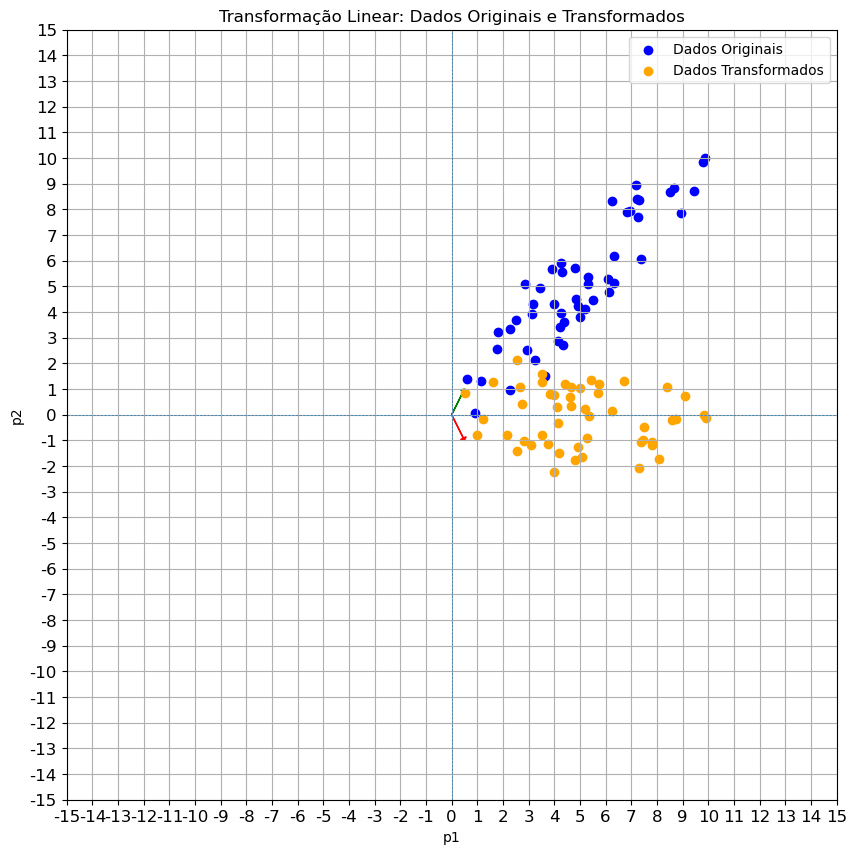

In [21]:
# Gráfico
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax) + 1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax) + 1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Matriz de transformação
m = np.array([[0.5, 0.5],
              [1, -1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0, 0], m[1, 0],
         head_width=0.25,
         head_length=0.1,
         fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0, 1], m[1, 1],
         head_width=0.25,
         head_length=0.1,
         fc='r', ec='r', 
         length_includes_head=True)

# Linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Transformação linear
df_rot = np.matmul(m, data_matrix.transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='Dados Originais', color='blue')

# Plotar os dados transformados
plt.scatter(df_rot[0, :], df_rot[1, :], label='Dados Transformados', color='orange')

# Legenda
plt.legend()
plt.title('Transformação Linear: Dados Originais e Transformados')
plt.xlabel('p1')
plt.ylabel('p2')
plt.grid()
plt.show()

a média dos alunos não está muito alta, mas as provas não possuem relação

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [35]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# a) Obtendo a soma e a diferença através de uma multiplicação matricial
# Matriz de transformação
B = np.array([[1, 1], [1, -1]])  # [soma, diferença]
data_matrix = df.to_numpy()
transformed_data_sum_diff = data_matrix @ B.T  # Multiplicação matricial

# Criação do DataFrame para as transformações
transformed_sum_diff_df = pd.DataFrame(transformed_data_sum_diff, columns=['soma', 'diferenca'])

print("\nDados transformados (Soma e Diferença):")
print(transformed_sum_diff_df.head())


Dados transformados (Soma e Diferença):
        soma  diferenca
0  14.908120  -0.978736
1   7.960930  -2.238143
2   3.242944   1.294085
3   9.987507   1.038788
4  16.133092  -1.743712


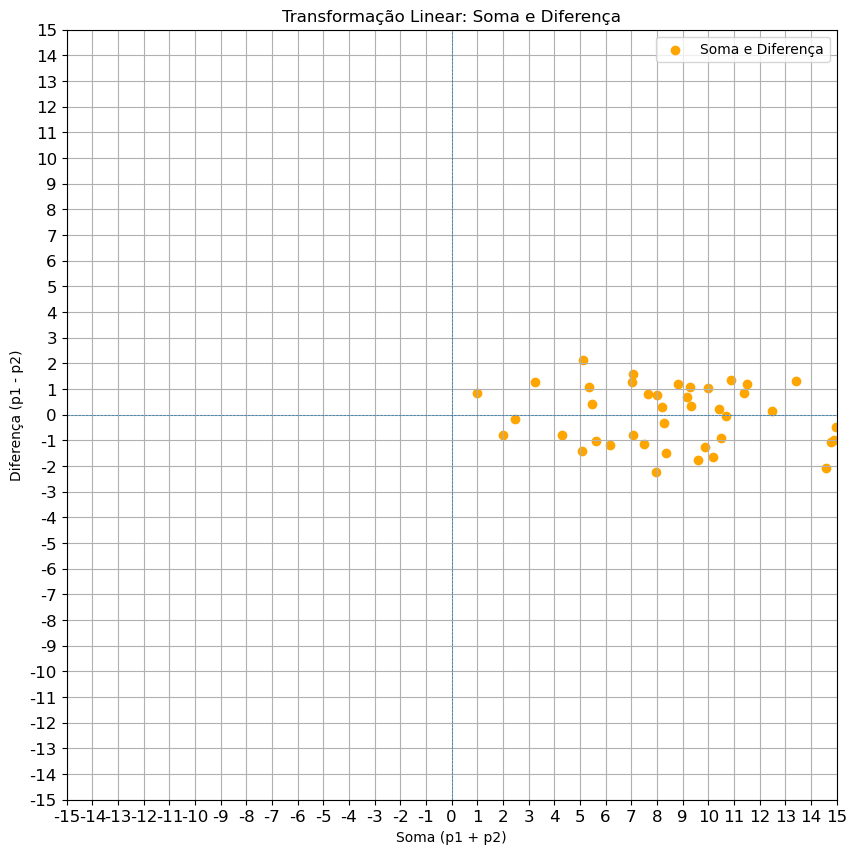

In [55]:
# Gráfico
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

# Definindo limites do gráfico
xmin = -15
xmax = 15
ymin = -15
ymax = 15

ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Configuração dos ticks
lista_xticks = list(range(int(xmin), int(xmax) + 1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax) + 1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Linhas de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plotar os dados transformados
plt.scatter(transformed_sum_diff_df['soma'], transformed_sum_diff_df['diferenca'], label='Soma e Diferença', color='orange')

# Legenda
plt.legend()
plt.title('Transformação Linear: Soma e Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid()
plt.show()
